# Deep Neural Network for Image Classification

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It is a non-cat picture


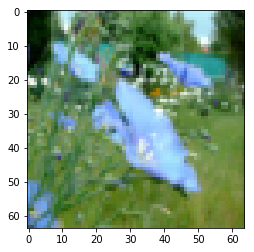

In [3]:
# Example of a picture 
index = 20
plt.imshow(train_x_orig[index])
print('y = ' +str(train_y[0,index]) + '. It is a ' + classes[train_y[0,index]].decode('utf-8') + ' picture')

In [4]:
# Explore dataset
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print('Number of training examples: ' + str(m_train))
print('Number of testing examples: ' + str(m_test))
print('Each image is of size: ' + str(num_px))
print('train_x_orig shape: ' + str(train_x_orig.shape))
print('train_y shape: ' + str(train_y.shape))
print('test_x_orig shape: ' + str(test_x_orig.shape))
print('test_y shape: ' + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: 64
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [5]:
# Reshape the training and test examples
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

print('train_x shape: ' + str(train_x.shape))
print('test_x shape: ' + str(test_x.shape))

train_x shape: (12288, 209)
test_x shape: (12288, 50)


## Two-layer Neural Network

# List of helper functions:
```python
    def initialize_parameters(n_x, n_h, n_y): return parameters
    def linear_activation_forward(A_prev, W, b, activation): 
        return A, cache
    def compute_cost(Al, Y): return cost
    def linear_activation_backward(dA, cache, activation): 
        return dA_prev, dW, db
    def update_parameters(parameters, grads, learning_rate) 
        return parameters
    ```

In [6]:
### Constants Defining the Model
n_x = 12288
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [7]:
# Two-layer Model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true label vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, print the cost every 100 iterations
    
    Returns:
    parameters -- a dictionary containing W1, b1, W2, b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Retrieve each parameter
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Loop Gradient Descent
    for i in range(num_iterations):
        # Forward Propagation
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        
        # Compute Cost
        cost = compute_cost(A2, Y)
        
        # Backward Propagation
         # Compute dA2 for Backprop
        dA2 = - (np.divide(Y, A2) - np.divide(1-Y, 1-A2))
        
         # Backprop...
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        
         # Stores all gradients to grads
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update Parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Retrieve new parameters
        W1 = parameters['W1']
        b1 = parameters['b1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        
        # Print the cost every 100 iterations:
        if print_cost and i % 100 == 0:
            print('Cost after iterations {}: {}'.format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('iterations (per tens)')
    plt.title('Learning rate =' + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iterations 0: 0.6930497356599888
Cost after iterations 100: 0.6464320953428849
Cost after iterations 200: 0.6325140647912677
Cost after iterations 300: 0.6015024920354665
Cost after iterations 400: 0.5601966311605747
Cost after iterations 500: 0.5158304772764729
Cost after iterations 600: 0.47549013139433255
Cost after iterations 700: 0.43391631512257495
Cost after iterations 800: 0.4007977536203886
Cost after iterations 900: 0.3580705011323798
Cost after iterations 1000: 0.3394281538366412
Cost after iterations 1100: 0.3052753636196264
Cost after iterations 1200: 0.2749137728213015
Cost after iterations 1300: 0.24681768210614846
Cost after iterations 1400: 0.19850735037466108
Cost after iterations 1500: 0.17448318112556654
Cost after iterations 1600: 0.17080762978096023
Cost after iterations 1700: 0.11306524562164728
Cost after iterations 1800: 0.09629426845937154
Cost after iterations 1900: 0.08342617959726861
Cost after iterations 2000: 0.07439078704319084
Cost after iter

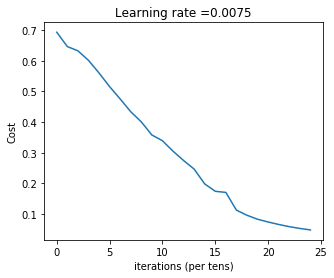

In [8]:
parameters = two_layer_model(train_x, train_y, layers_dims=(n_x, n_h, n_y), num_iterations=2500, print_cost=True)

In [9]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 1.0


In [10]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


## L-layer Network
```python
    def initialize_parameters_deep(layers_dims): 
        return parameters
    def L_model_forward(X, parameters):
        return Al, caches
    def compute_cost(Al, Y):
        return cost
    def L_model_backward(Al, Y, caches):
        return grads
    def update_parameters(parameters, grads, learning_rate):
        return parameters
        ```

In [11]:
### Constant
layers_dims = [12288, 20, 7, 5, 1]

In [12]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    """
    Implements a L-layer neural network:
        [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true label vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1)
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimation loop
    print_cost -- if True, prints the cost every 100 iterations
    
    Returns:
    parameters -- parameters learnt by model
    """
    
    np.random.seed(1)
    costs = []
    
    # Initialization Parameters
    parameters = initialize_parameters_deep(layers_dims)
    
    # Loop Gradient Descent
    for i in range(num_iterations):
        # Forward Propagation
        Al, caches = L_model_forward(X, parameters)
        
        # Compute Cost
        cost = compute_cost(Al, Y)
        
        # Backward Propagation
        grads = L_model_backward(Al, Y, caches)
        
        # Update parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print cost
        if print_cost and i % 100 == 0:
            print('Cost after iterations %i: %f' %(i, cost))
            costs.append(cost)
            
    # Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations per tens')
    plt.title('Learning rate = ' + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iterations 0: 0.771749
Cost after iterations 100: 0.672053
Cost after iterations 200: 0.648263
Cost after iterations 300: 0.611507
Cost after iterations 400: 0.567047
Cost after iterations 500: 0.540138
Cost after iterations 600: 0.527930
Cost after iterations 700: 0.465477
Cost after iterations 800: 0.369126
Cost after iterations 900: 0.391747
Cost after iterations 1000: 0.315187
Cost after iterations 1100: 0.272700
Cost after iterations 1200: 0.237419
Cost after iterations 1300: 0.199601
Cost after iterations 1400: 0.189263
Cost after iterations 1500: 0.161189
Cost after iterations 1600: 0.148214
Cost after iterations 1700: 0.137775
Cost after iterations 1800: 0.129740
Cost after iterations 1900: 0.121225
Cost after iterations 2000: 0.113821
Cost after iterations 2100: 0.107839
Cost after iterations 2200: 0.102855
Cost after iterations 2300: 0.100897
Cost after iterations 2400: 0.092878


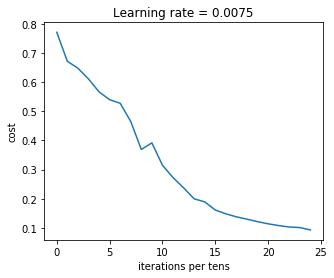

In [13]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations=2500, print_cost=True)

In [14]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.985645933014


In [15]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


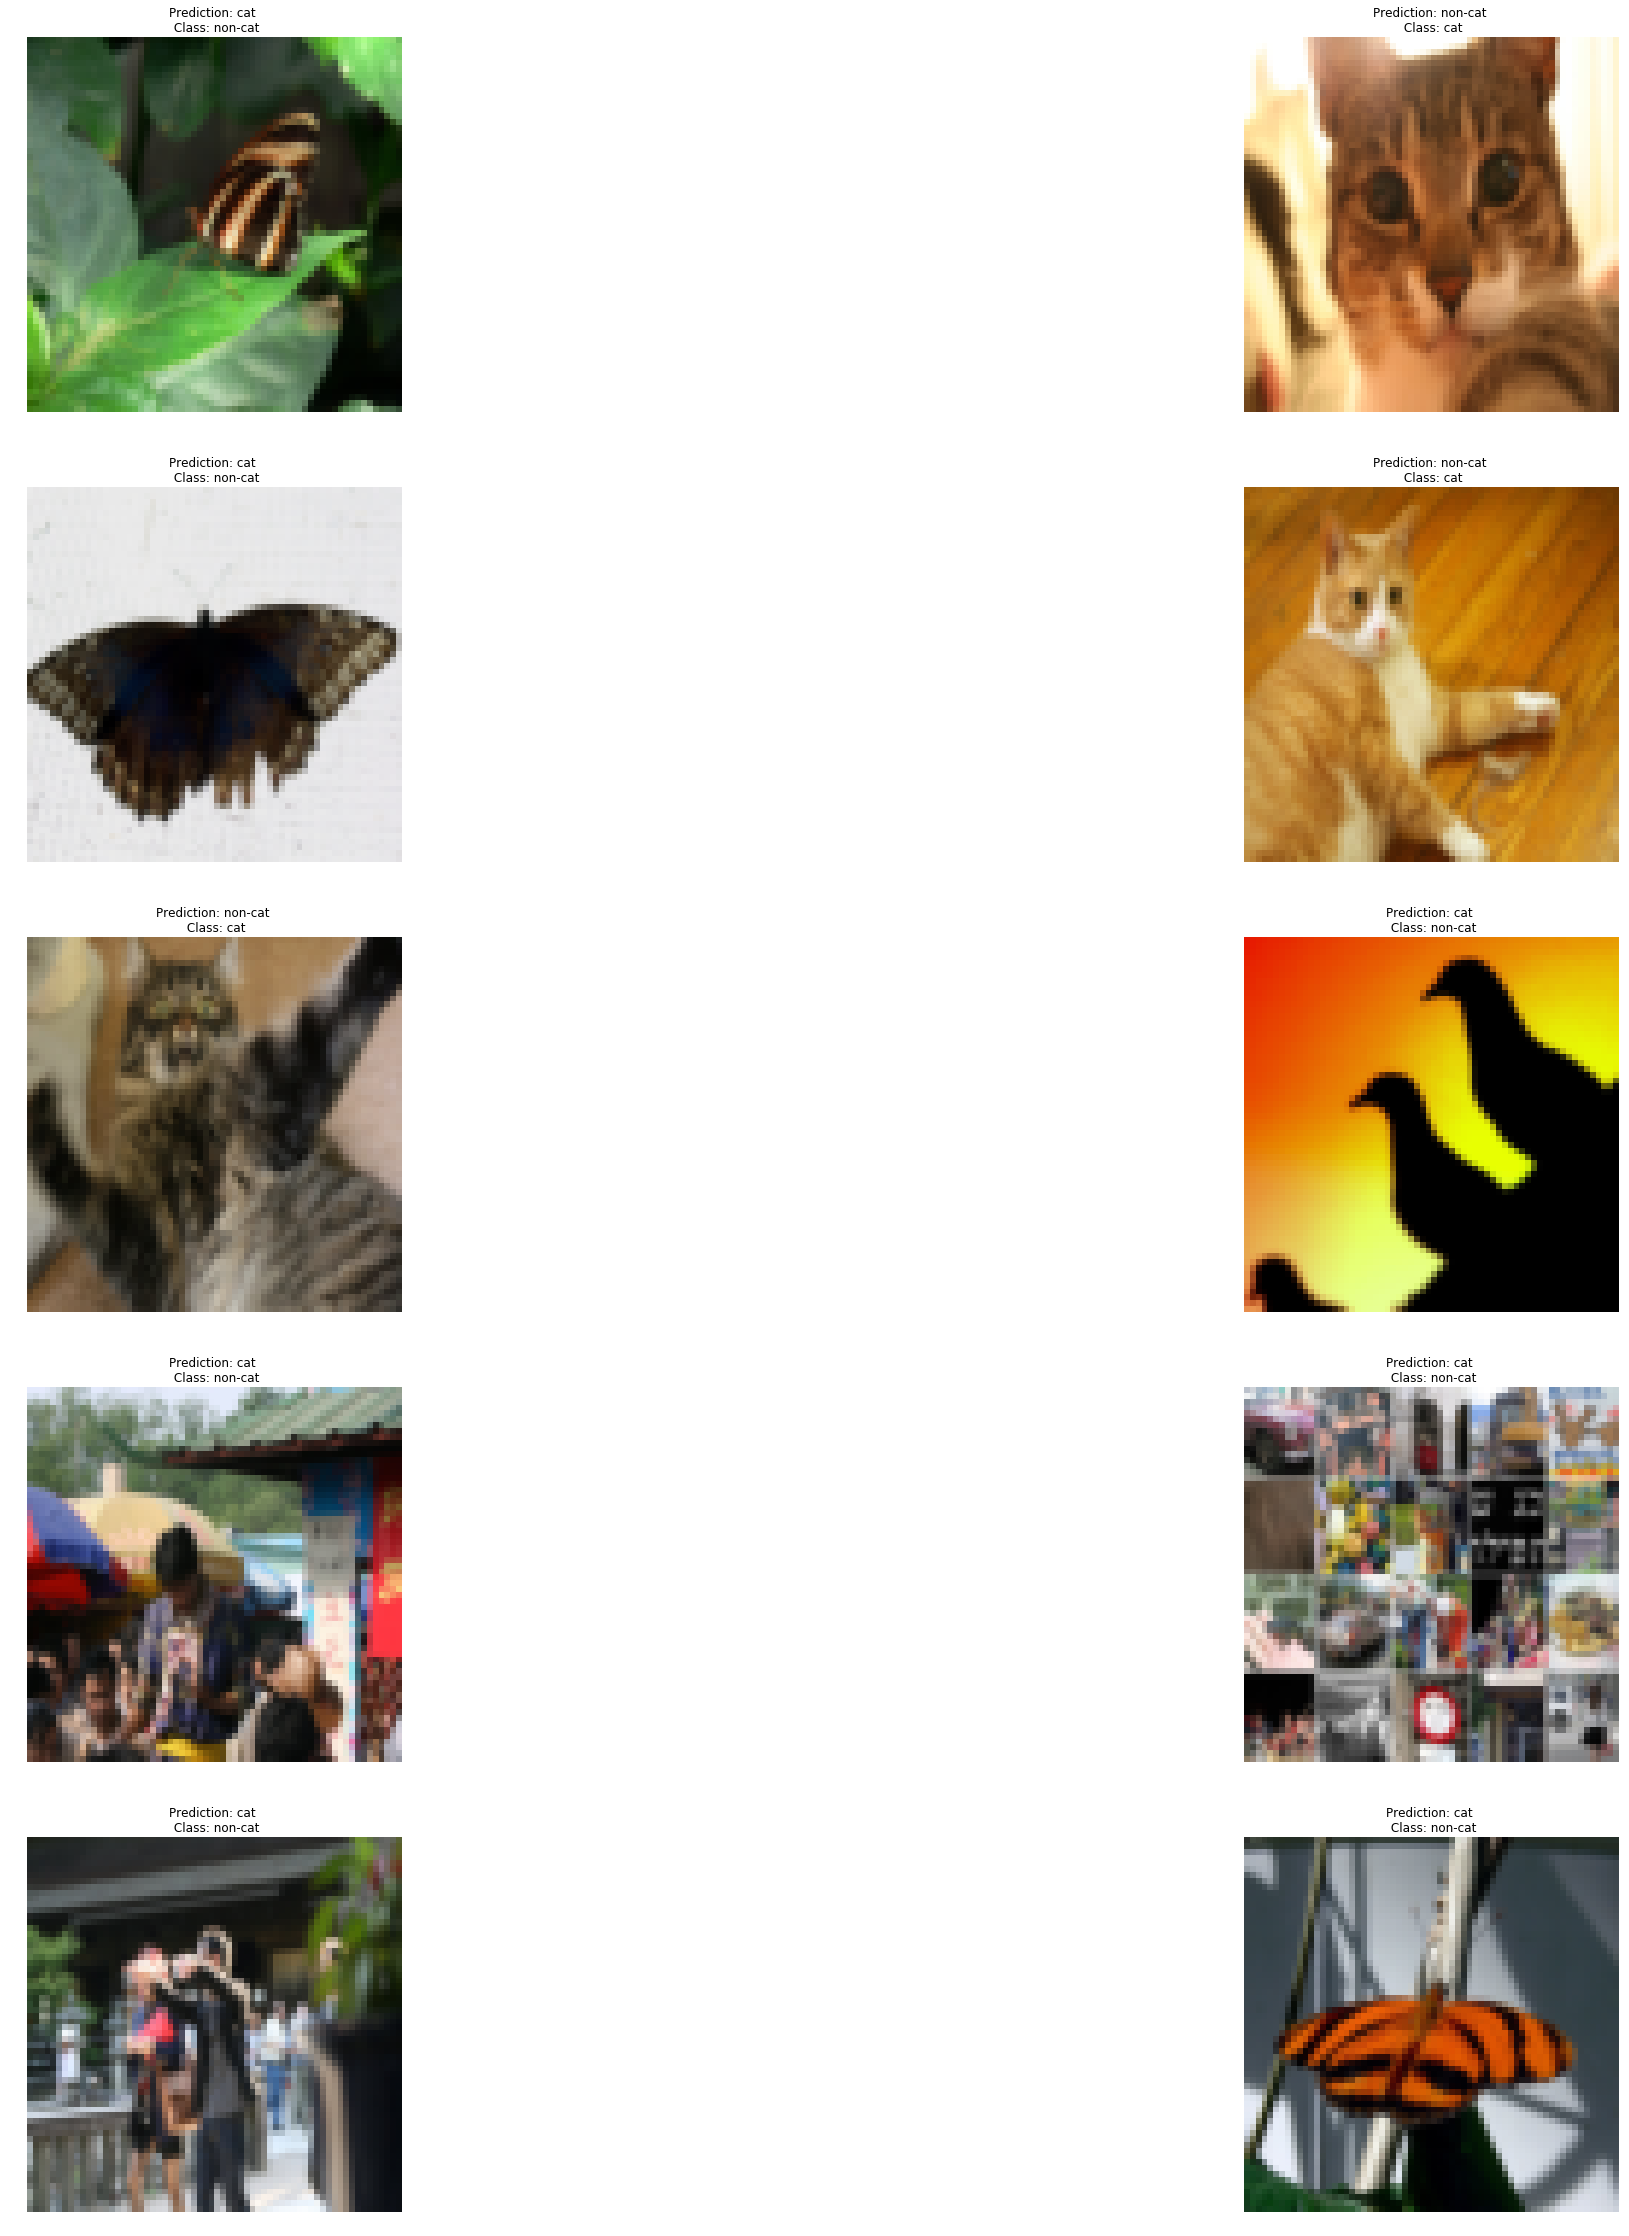

In [28]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

In [25]:
np.where?